We'll use:
🎯 Target for regression → Customer Satisfaction Rating (1.0 to 5.0)
🎯 Target for classification → Satisfaction Level (Low, Medium, High)

In [41]:
import pandas as pd
df=pd.read_csv(r"D:\Unified Mentor Intership\Data Science projects\Customer Satisfaction\Data\customer_support_FE.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Time to Resolution,Customer Satisfaction Rating,Response Delay (hrs),Resolution Delay (hrs),Purchase Month,Purchase Weekday,Ticket Description Length,Fast Response,Fast Resolution,Satisfaction_Label
0,1,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,2023-01-06 18:05:00,3.0,21755.233333,6.850000,7,Tuesday,42,False,True,2
1,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,2023-01-06 01:57:00,3.0,18823.483333,-5.533333,11,Friday,41,False,True,2
2,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,2023-01-06 19:53:00,1.0,25608.200000,19.683333,2,Tuesday,55,False,True,0
3,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,...,2023-01-06 19:53:00,1.0,17225.766667,2.116667,1,Tuesday,38,False,True,0
4,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,...,2023-01-06 09:27:00,1.0,10548.083333,-2.633333,10,Sunday,50,False,True,0


Setup – Imports & Feature/Target Split

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report


Convert target column for classification

In [43]:
def label_satisfaction(rating):
    if rating <= 2:
        return 'Low'
    elif rating == 3:
        return 'Medium'
    else:
        return 'High'

df['Satisfaction Level'] = df['Customer Satisfaction Rating'].apply(label_satisfaction)


Select features

In [44]:
features = ['Customer Age', 'Response Delay (hrs)', 'Resolution Delay (hrs)',
            'Ticket Priority', 'Ticket Channel', 'Ticket Type']


Encode categorical features

In [45]:
df_encoded = pd.get_dummies(df[features], drop_first=True)

Standardize numeric features

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)


Targets

In [47]:
y_reg = df['Customer Satisfaction Rating']
y_clf = df['Satisfaction Level']

**Regression Modeling**

Train-test split

In [48]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)


 Model

In [49]:
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train_r, y_train_r)

RandomForestRegressor(random_state=42)

Predict

In [50]:
y_pred_r = reg_model.predict(X_test_r)

Evaluation

In [51]:
mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("Regression MSE:", mse)
print("Regression R2 Score:", r2)


Regression MSE: 2.1580285198555957
Regression R2 Score: -0.09404094344079361


**Classification Modeling**

Encode target labels

In [52]:
le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)

Train-test split

In [53]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_clf_encoded, test_size=0.2, random_state=42)


Model

In [54]:
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_c, y_train_c)

RandomForestClassifier(random_state=42)

 Predict

In [55]:
y_pred_c = clf_model.predict(X_test_c)

Evaluation

In [56]:
acc = accuracy_score(y_test_c, y_pred_c)
report = classification_report(y_test_c, y_pred_c, target_names=le.classes_)

print("Classification Accuracy:", acc)
print("Classification Report:\n", report)

Classification Accuracy: 0.37725631768953066
Classification Report:
               precision    recall  f1-score   support

        High       0.37      0.44      0.40       216
         Low       0.43      0.48      0.46       226
      Medium       0.12      0.04      0.06       112

    accuracy                           0.38       554
   macro avg       0.31      0.32      0.31       554
weighted avg       0.34      0.38      0.36       554



**Model Evaluation & Interpretation**
We'll interpret both:
📈 Regression model (How well it predicts satisfaction scores)

🧠 Classification model (How accurately it classifies satisfaction levels)

🔍 Plus: Feature Importance (Why the model predicts what it does)

Regression Evaluation – Plots

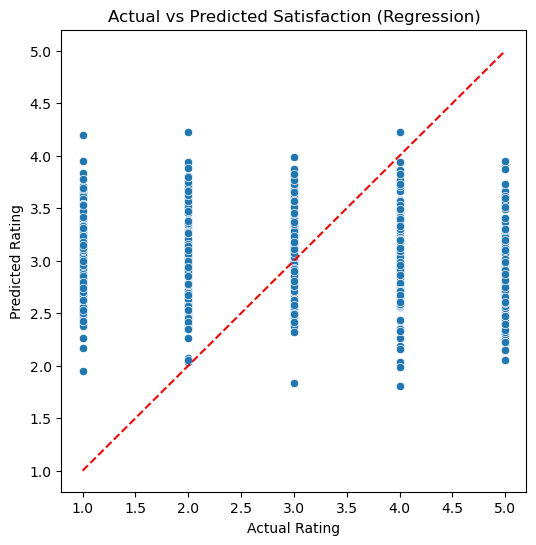

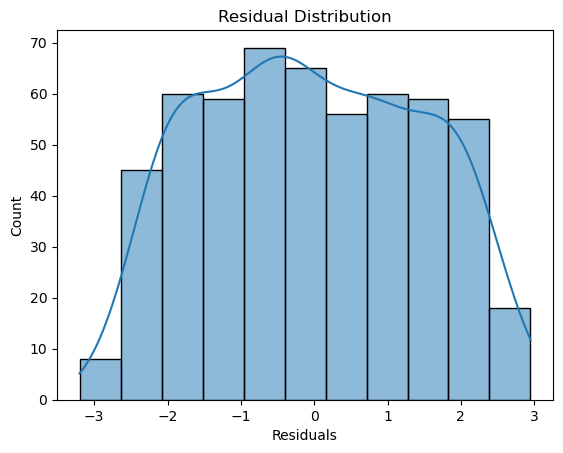

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_r, y=y_pred_r)
plt.plot([1, 5], [1, 5], 'r--')  # 1:1 line
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Satisfaction (Regression)")
plt.show()

# Residual plot
residuals = y_test_r - y_pred_r
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


Classification Evaluation

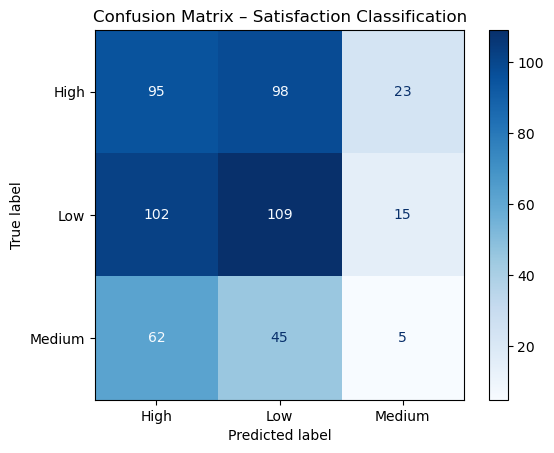

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Satisfaction Classification")
plt.show()


**Feature Importance (for Both Models)**

✅ Regression Feature Importance

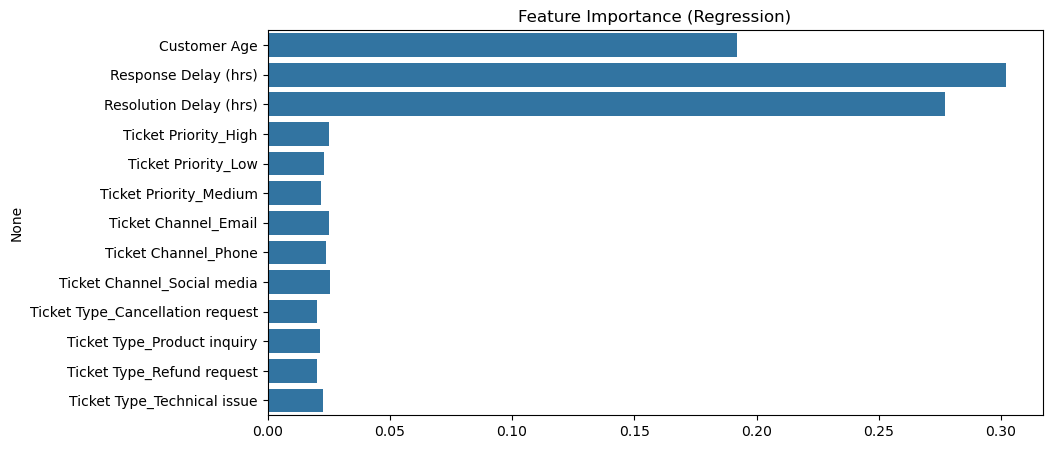

In [59]:
importances_r = reg_model.feature_importances_
feat_names = df_encoded.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=importances_r, y=feat_names)
plt.title("Feature Importance (Regression)")
plt.show()


✅ Classification Feature Importance

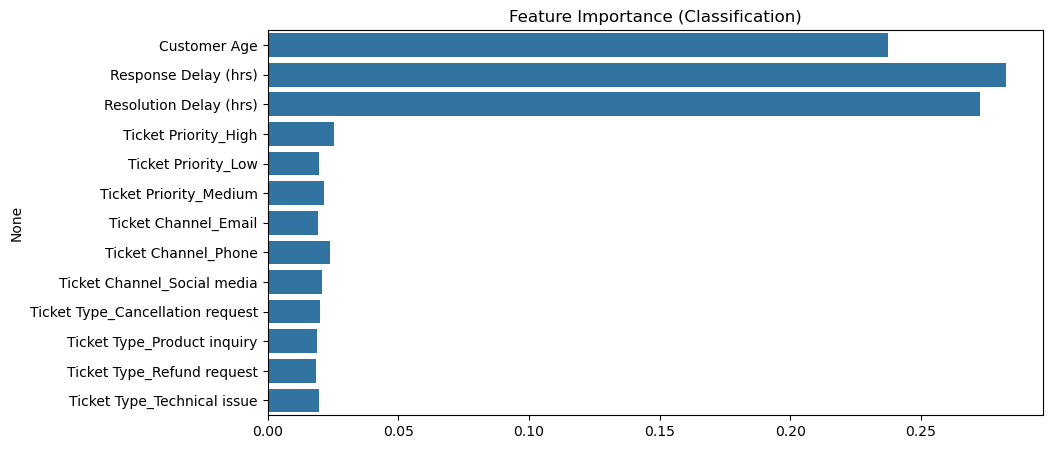

In [60]:
importances_c = clf_model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=importances_c, y=feat_names)
plt.title("Feature Importance (Classification)")
plt.show()
